In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
# Numerical libraries
import numpy as np   

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

from sklearn import metrics

import pandas as pd

from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import single, cophenet
from scipy.spatial.distance import pdist, squareform


xl = pd.ExcelFile("Credit Card Customer Data.xlsx")
mydata = xl.parse("Sheet1")

In [2]:
mydata.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [3]:
mydata.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [4]:
mydata.drop('Sl_No', axis=1, inplace=True)

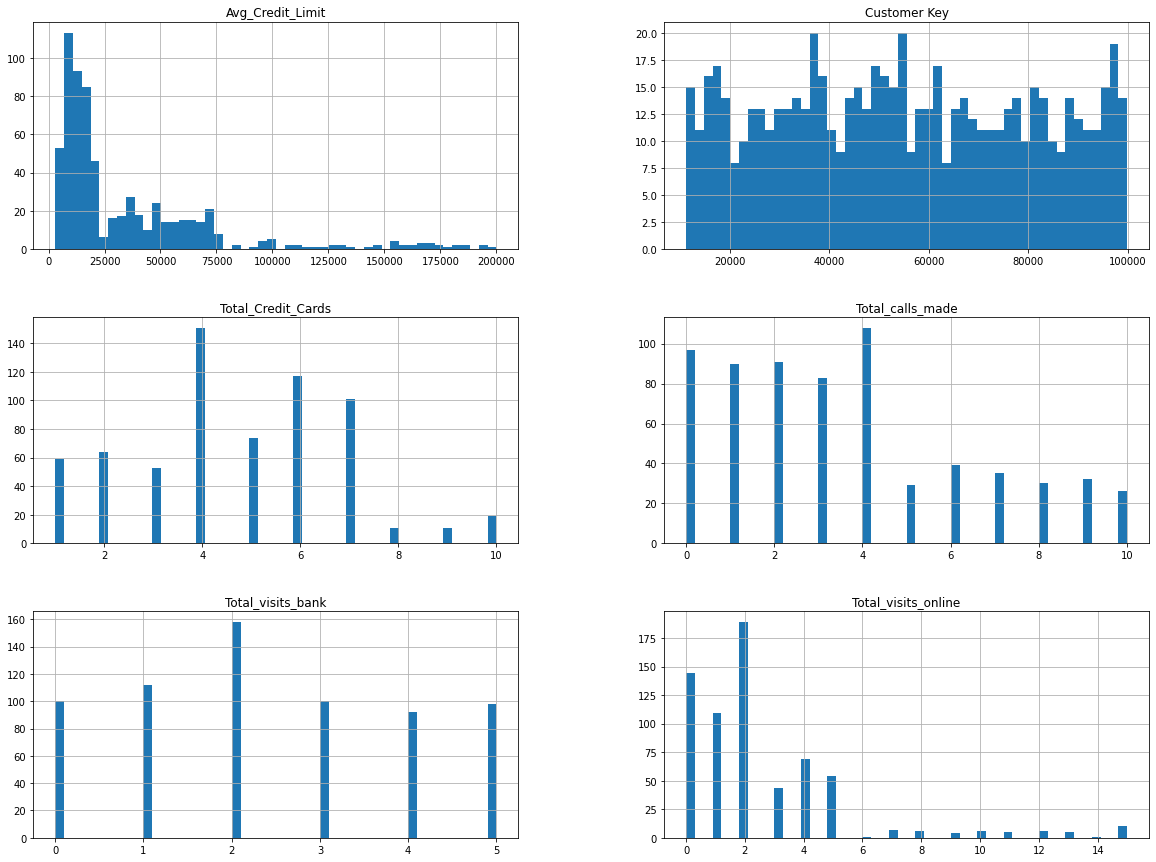

In [5]:
mydata.hist(bins=50,figsize=(20,15))
plt.savefig("Plots")
plt.show()

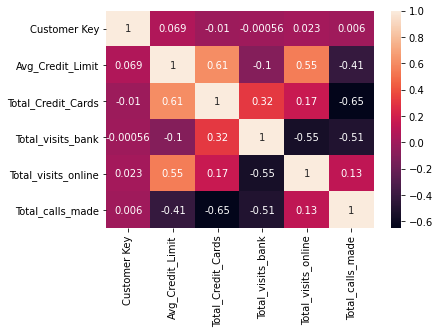

In [6]:
corr = mydata.corr()
sns.heatmap(corr, annot = True)

In [7]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer Key         660 non-null    int64
 1   Avg_Credit_Limit     660 non-null    int64
 2   Total_Credit_Cards   660 non-null    int64
 3   Total_visits_bank    660 non-null    int64
 4   Total_visits_online  660 non-null    int64
 5   Total_calls_made     660 non-null    int64
dtypes: int64(6)
memory usage: 31.1 KB


In [8]:
mydata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.5,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.0,10.0


In [9]:
mydata.drop(columns = {'Customer Key'}, inplace=True)

In [10]:
from scipy.stats import zscore
mydata = mydata.apply(zscore)

In [11]:
mydata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,8.612639e-17,1.000758,-0.839808,-0.653623,-0.440840,0.357097,4.399975
Total_Credit_Cards,660.0,4.306320e-17,1.000758,-1.710864,-0.787585,0.135694,0.597334,2.443892
Total_visits_bank,660.0,-4.306320e-17,1.000758,-1.473731,-0.860451,-0.247170,0.979390,1.592670
Total_visits_online,660.0,7.536059e-17,1.000758,-0.888380,-0.547490,-0.206600,0.475180,4.224968
Total_calls_made,660.0,-8.612639e-17,1.000758,-1.251537,-0.902271,-0.203739,0.494794,2.241125


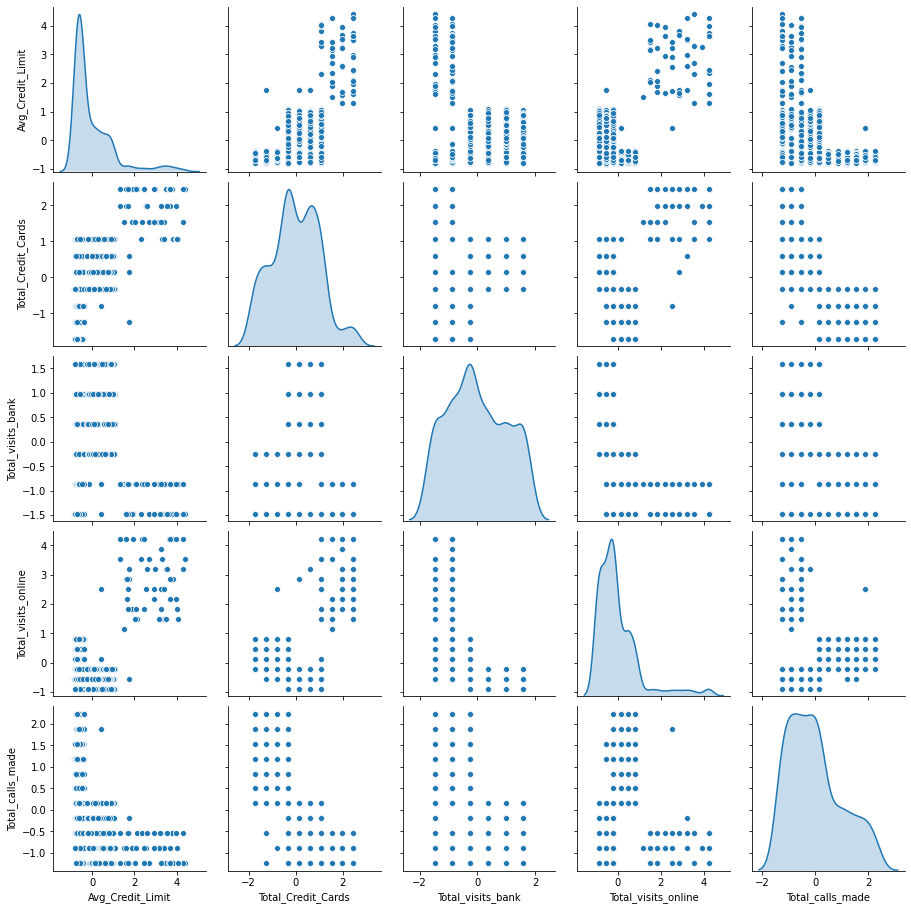

In [12]:
import seaborn as sns
sns.pairplot(mydata, diag_kind='kde') 

In [13]:
##Scale the data
from scipy.stats import zscore

mydata_z = mydata.apply(zscore)


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

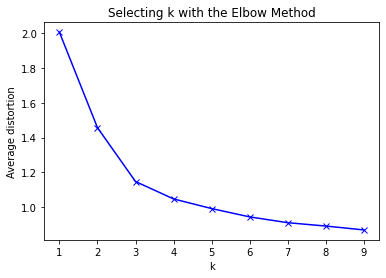

In [14]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(mydata)
    prediction=model.predict(mydata)
    meanDistortions.append(sum(np.min(cdist(mydata, model.cluster_centers_, 'euclidean'), axis=1)) / mydata
                           .shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [15]:
#Set the value of k=3
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2345)

In [16]:
kmeans.fit(mydata_z)

KMeans(n_clusters=3, n_init=15, random_state=2345)

In [17]:
centroids = kmeans.cluster_centers_

In [18]:
centroids

array([[-0.59579625, -1.05962278, -0.9015185 ,  0.32299678,  1.14810882],
       [-0.02106178,  0.37368962,  0.6663945 , -0.55367163, -0.55300488],
       [ 2.83176409,  1.86222621, -1.10576269,  2.82731942, -0.87432983]])

In [19]:
centroid_df = pd.DataFrame(centroids, columns = list(mydata_z) )

In [20]:
print(centroid_df)

   Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0         -0.595796           -1.059623          -0.901518   
1         -0.021062            0.373690           0.666395   
2          2.831764            1.862226          -1.105763   

   Total_visits_online  Total_calls_made  
0             0.322997          1.148109  
1            -0.553672         -0.553005  
2             2.827319         -0.874330  


In [21]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [22]:
# Joining the label dataframe with the data frame.
df_labeled = mydata.join(df_labels)

In [23]:
df_analysis = (df_labeled.groupby(['labels'] , axis=0)).head(4177)  # the groupby creates a groupeddataframe that needs 
# to be converted back to dataframe. 
df_analysis

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,1
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,0
2,0.410293,1.058973,-0.860451,0.134290,0.145528,1
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,1
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2
...,...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537,2
656,1.314621,2.443892,-0.860451,3.543188,-0.553005,2
657,2.937092,1.520613,-0.860451,2.179629,-0.902271,2
658,3.655235,2.443892,-0.860451,4.224968,-1.251537,2


In [24]:
df_labeled['labels'].value_counts()  

1    386
0    224
2     50
Name: labels, dtype: int64

In [25]:
# Let us try with K = 5 
final_model=KMeans(5)
final_model.fit(mydata)
prediction=final_model.predict(mydata)
mydata["GROUP"] = prediction


In [26]:
mydata

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,1
2,0.410293,1.058973,-0.860451,0.134290,0.145528,0
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,0
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2
...,...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537,2
656,1.314621,2.443892,-0.860451,3.543188,-0.553005,2
657,2.937092,1.520613,-0.860451,2.179629,-0.902271,2
658,3.655235,2.443892,-0.860451,4.224968,-1.251537,2


In [27]:
print("Groups Assigned : \n")
mydata

Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,1
2,0.410293,1.058973,-0.860451,0.134290,0.145528,0
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,0
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2
...,...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537,2
656,1.314621,2.443892,-0.860451,3.543188,-0.553005,2
657,2.937092,1.520613,-0.860451,2.179629,-0.902271,2
658,3.655235,2.443892,-0.860451,4.224968,-1.251537,2


/Users/oa/workStation/venv/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/Users/oa/workStation/venv/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/Users/oa/workStation/venv/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117bee490>,
      dtype=object)

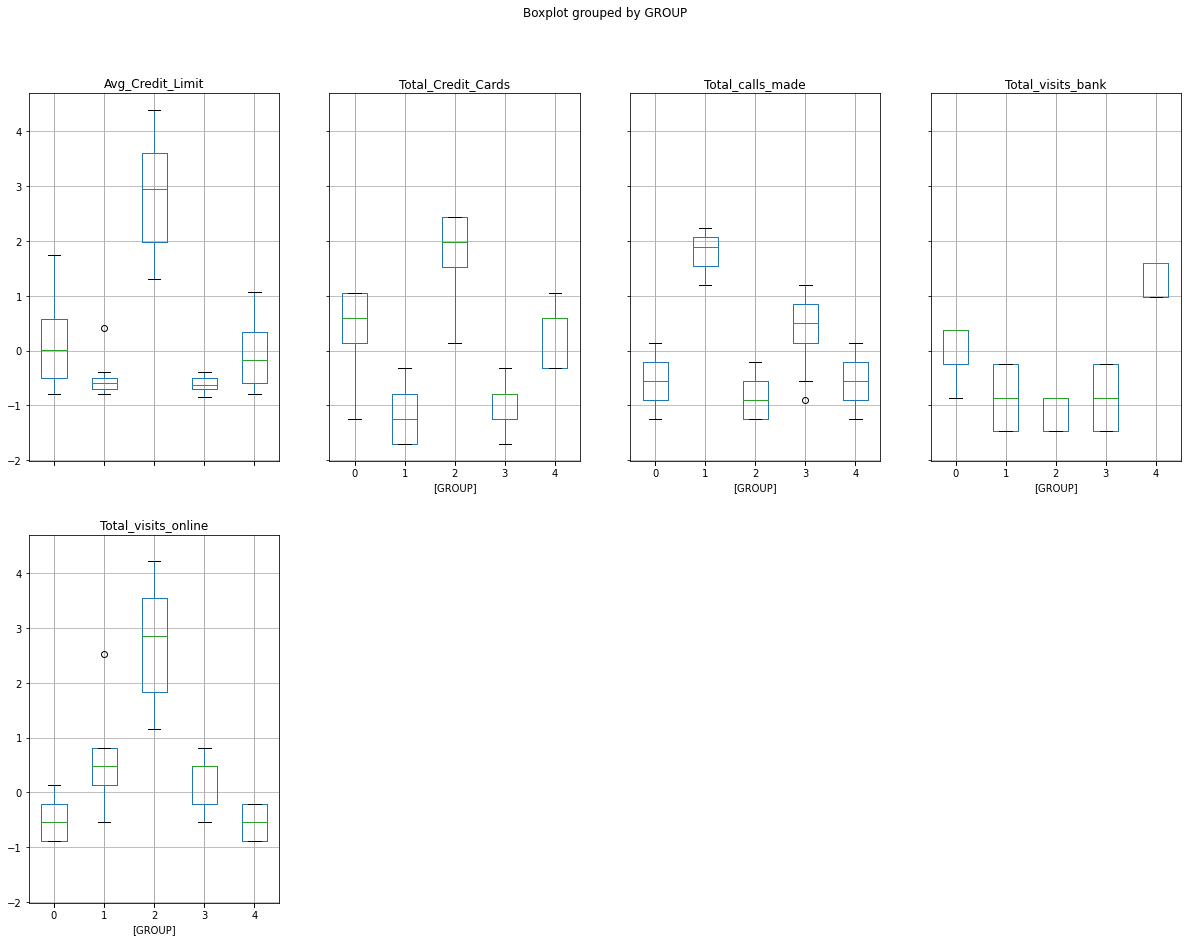

In [28]:
mydata.boxplot(by = 'GROUP',  layout=(2,4), figsize=(20, 15))

In [29]:
mydata = xl.parse("Sheet1")
mydata.drop('Sl_No', axis=1, inplace=True)

sc = StandardScaler()
X_std = pd.DataFrame(sc.fit_transform(mydata),columns=mydata.columns)

for x in range(2, 10):
    alg = KMeans(n_clusters = x, )
    label = alg.fit_predict(X_std)
    print('Silhouette-Score for', x,  'Clusters: ', silhouette_score(X_std, label))

Silhouette-Score for 2 Clusters:  0.33817196365464486
Silhouette-Score for 3 Clusters:  0.4177434852377372
Silhouette-Score for 4 Clusters:  0.3228907072652812
Silhouette-Score for 5 Clusters:  0.28520545431284394
Silhouette-Score for 6 Clusters:  0.25413205265109257
Silhouette-Score for 7 Clusters:  0.23781349147001954
Silhouette-Score for 8 Clusters:  0.22825880780827032
Silhouette-Score for 9 Clusters:  0.20788057573045088


# Hierarchical 

In [30]:
mydata = xl.parse("Sheet1")
mydata.drop('Sl_No', axis=1, inplace=True)
sc = StandardScaler()
X_std = pd.DataFrame(sc.fit_transform(mydata),columns=mydata.columns)

In [31]:
X_std.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.246920,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,-0.653203,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,-1.476098,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.571901,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,-0.300857,1.740187,0.597334,-1.473731,3.202298,-0.203739


In [32]:
Z = linkage(X_std, 'ward', metric='euclidean')
Z.shape

(659, 4)

In [33]:
Z[:]

array([[1.36000000e+02, 1.40000000e+02, 9.15241969e-02, 2.00000000e+00],
       [4.51000000e+02, 5.15000000e+02, 1.01032170e-01, 2.00000000e+00],
       [2.95000000e+02, 3.42000000e+02, 1.25315255e-01, 2.00000000e+00],
       ...,
       [1.31300000e+03, 1.31400000e+03, 2.29923609e+01, 3.88000000e+02],
       [1.31100000e+03, 1.31600000e+03, 4.70821459e+01, 4.38000000e+02],
       [1.31500000e+03, 1.31700000e+03, 5.01500773e+01, 6.60000000e+02]])

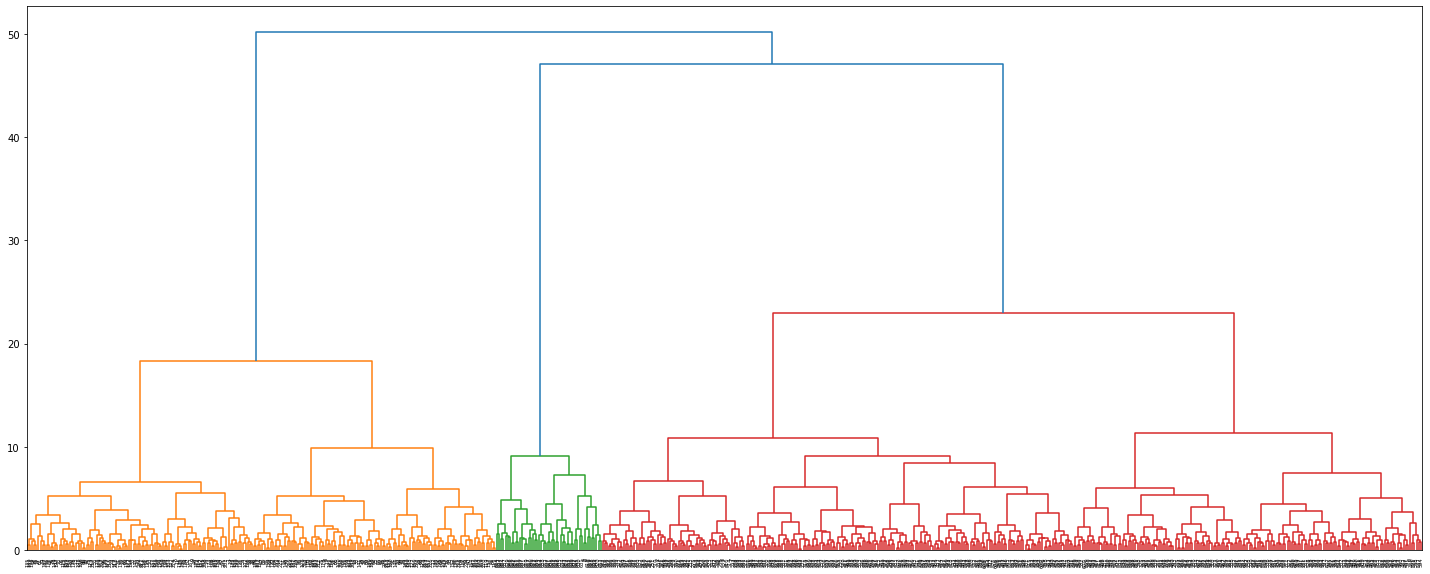

In [34]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

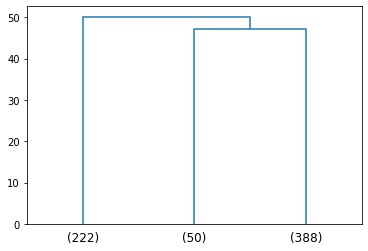

array([50.15007727, 22.99236094, 22.99236094, ...,  4.85906194,
        4.85906194,  2.54451104])

In [35]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()
cophenet(Z)

In [36]:
max_d = 40

In [37]:
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([3, 1, 3, 3, 2, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [38]:
X_std

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.246920,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,-0.653203,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,-1.476098,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.571901,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,-0.300857,1.740187,0.597334,-1.473731,3.202298,-0.203739
...,...,...,...,...,...,...
655,-0.157505,1.713589,2.443892,-0.860451,2.520519,-1.251537
656,0.218310,1.314621,2.443892,-0.860451,3.543188,-0.553005
657,-0.051055,2.937092,1.520613,-0.860451,2.179629,-0.902271
658,0.996298,3.655235,2.443892,-0.860451,4.224968,-1.251537


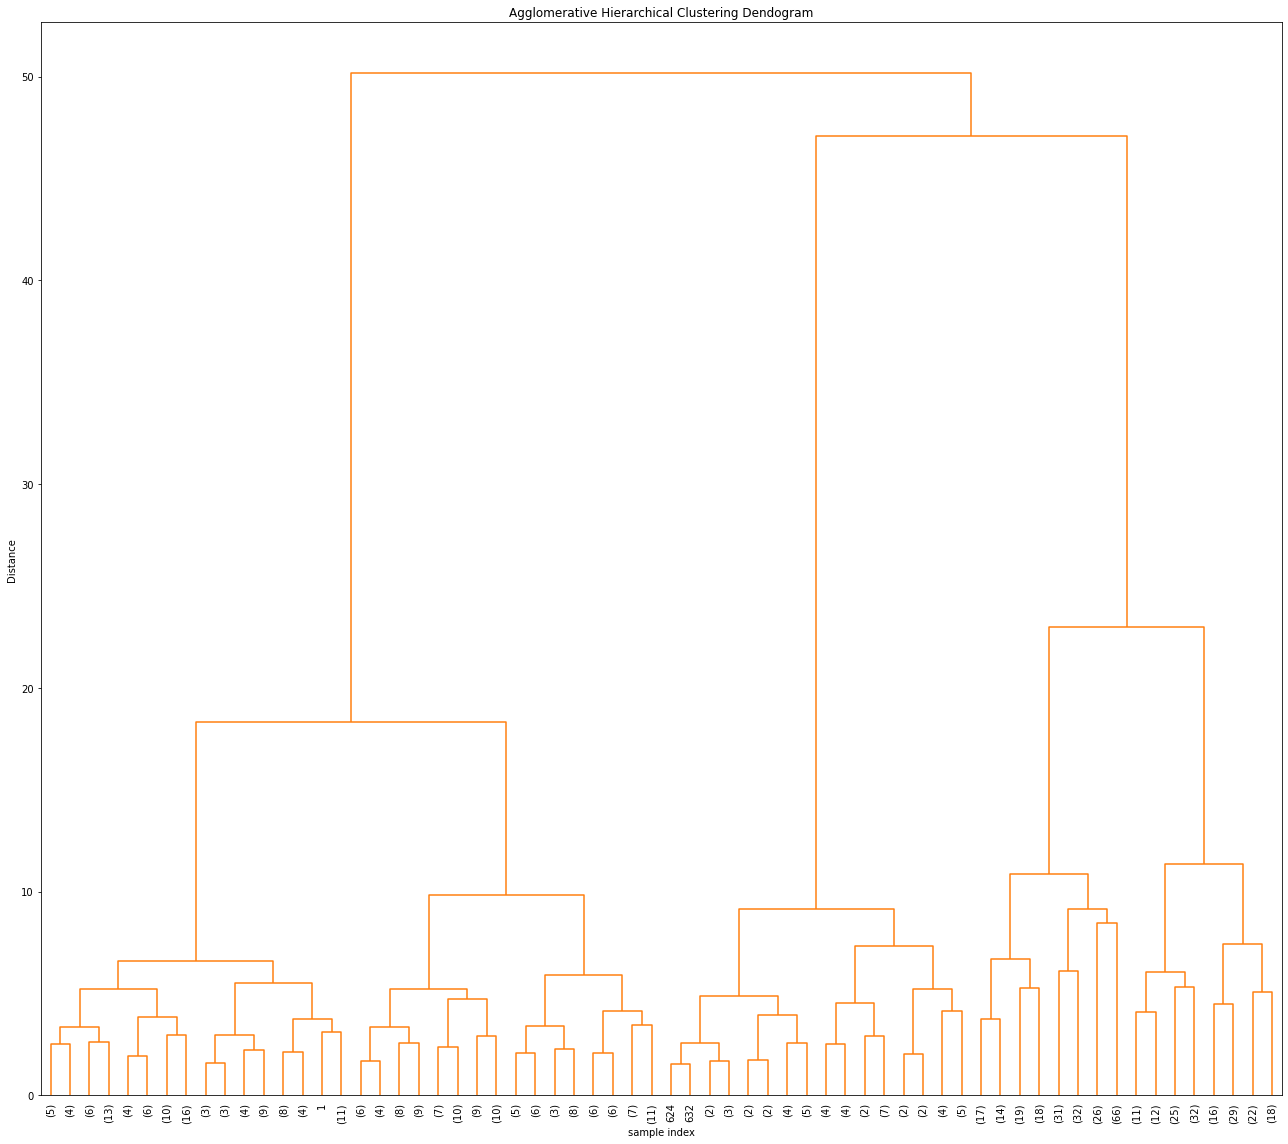

In [39]:
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(X_std, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=5,color_threshold=52,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

In [40]:
clusters

array([3, 1, 3, 3, 2, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [41]:
silhouette_score(X_std,clusters)

0.41782525470042764

# Other Linkage Methods : single

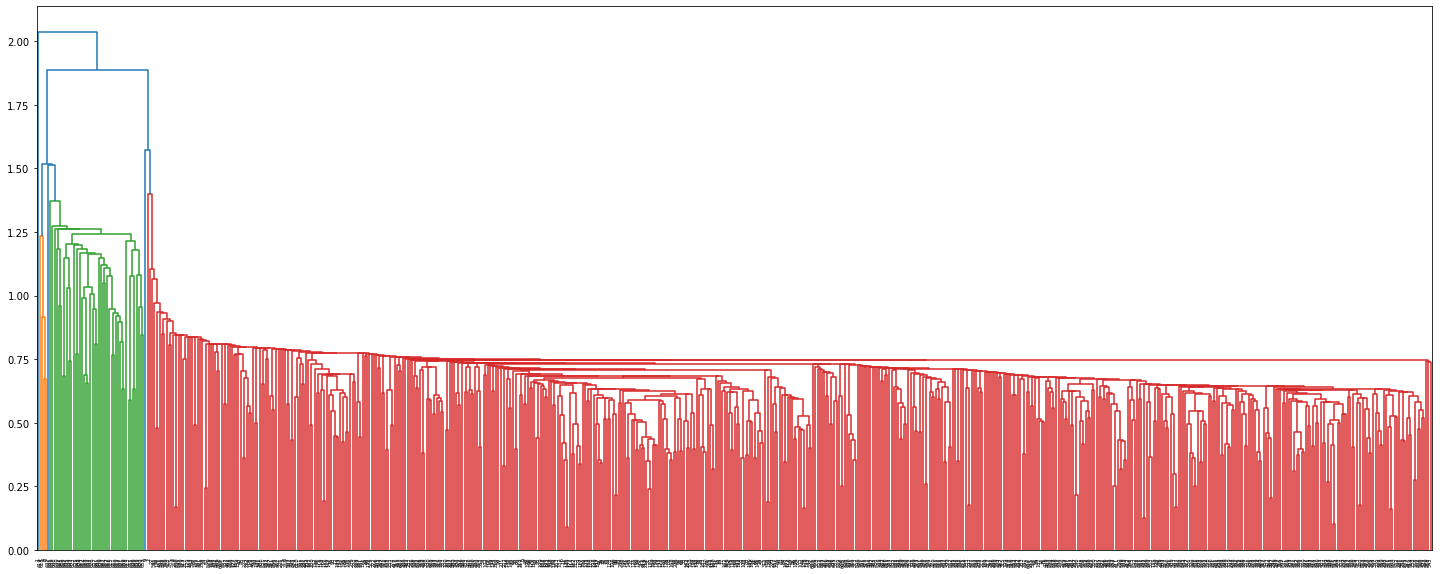

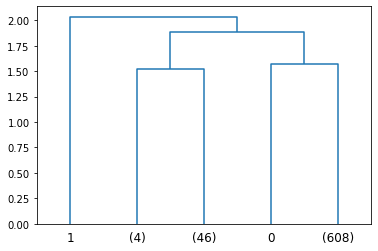

array([2.03470518, 1.57365409, 1.57365409, ..., 1.16270438, 1.16270438,
       0.9477295 ])

In [42]:
mydata = xl.parse("Sheet1")
mydata.drop('Sl_No', axis=1, inplace=True)

import numpy as np
sc = StandardScaler()
X_std = pd.DataFrame(sc.fit_transform(mydata),columns=mydata.columns)
Z = linkage(X_std, 'single', metric='euclidean')
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=5,  # show only the last p merged clusters
)
plt.show()
cophenet(Z)

In [43]:
max_d = 1.75
clusters = fcluster(Z, max_d, criterion='distance')
clusters
silhouette_score(X_std,clusters)

0.3107722686664712

# Other Linkage Methods : average

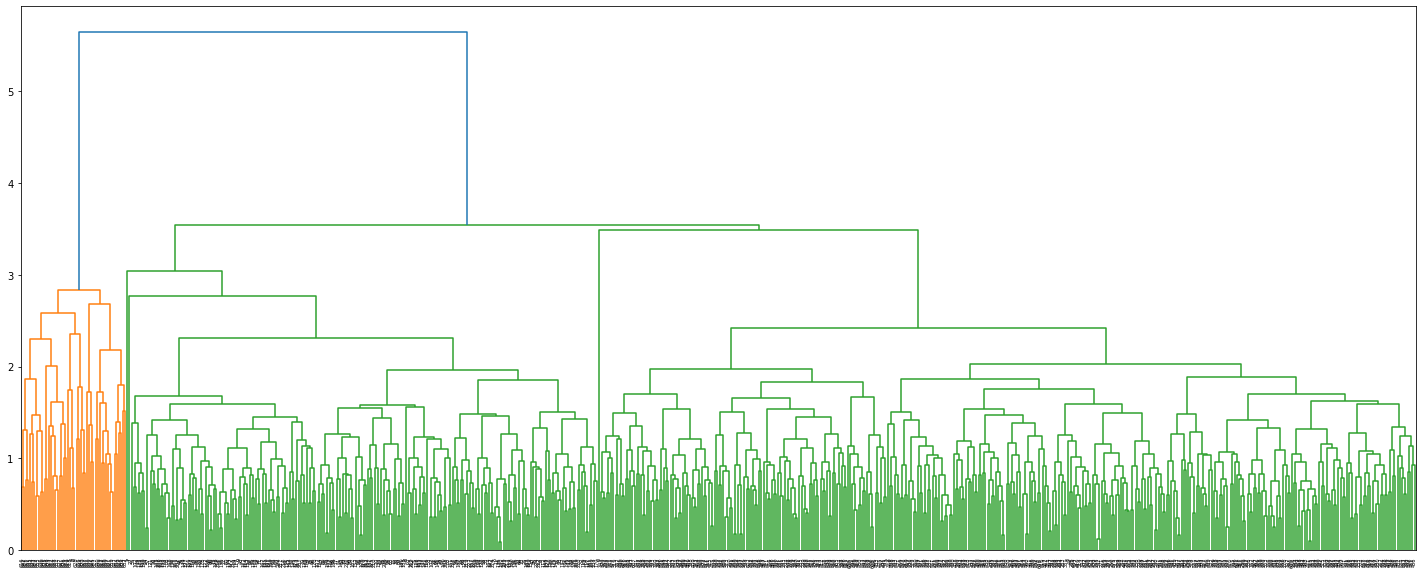

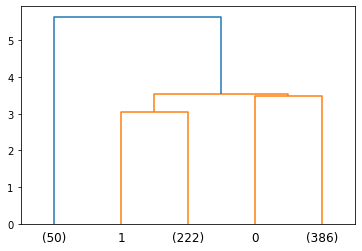

array([3.54222581, 3.48647828, 3.48647828, ..., 2.83916287, 2.83916287,
       1.296604  ])

In [44]:
mydata = xl.parse("Sheet1")
mydata.drop('Sl_No', axis=1, inplace=True)
sc = StandardScaler()
X_std = pd.DataFrame(sc.fit_transform(mydata),columns=mydata.columns)
Z = linkage(X_std, 'average', metric='euclidean')
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=5,  # show only the last p merged clusters
)
plt.show()
cophenet(Z)

In [45]:
max_d = 5
clusters = fcluster(Z, max_d, criterion='distance')
clusters
silhouette_score(X_std,clusters)

0.5127235086343557

# # Other Linkage Methods : COMPLETE

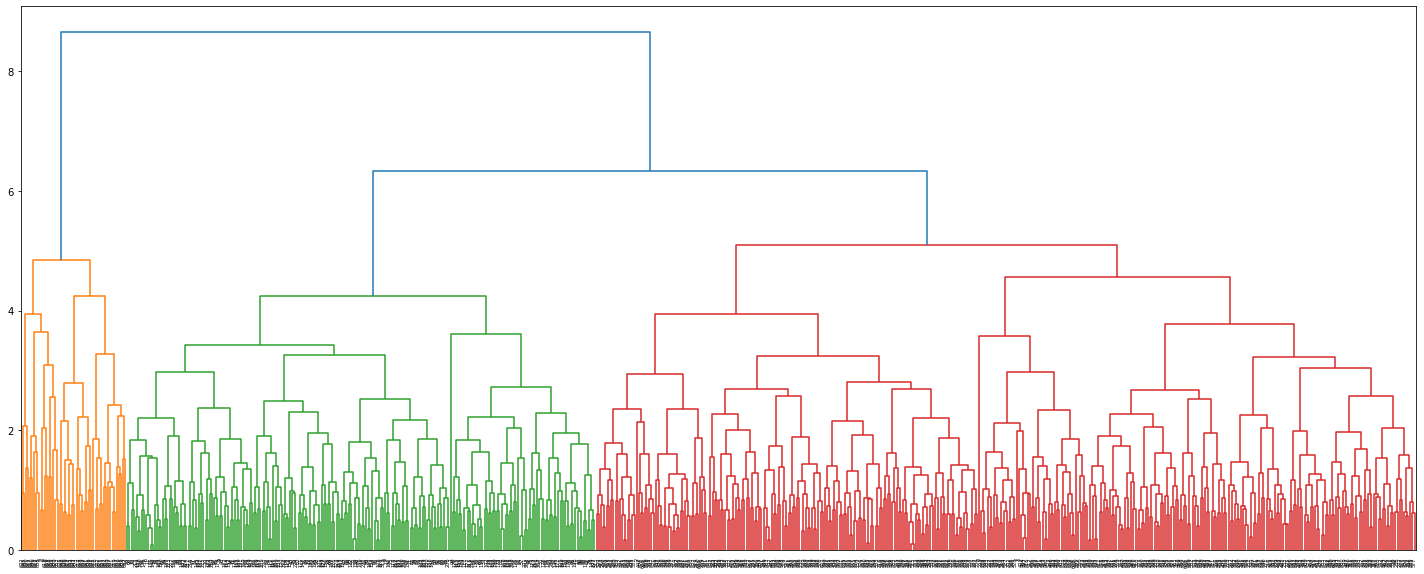

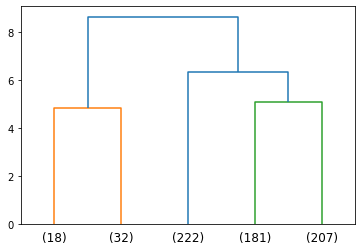

In [46]:
mydata = xl.parse("Sheet1")
mydata.drop('Sl_No', axis=1, inplace=True)
sc = StandardScaler()
X_std = pd.DataFrame(sc.fit_transform(mydata),columns=mydata.columns)
Z = linkage(X_std, 'complete', metric='euclidean')
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=5,  # show only the last p merged clusters
)
plt.show()

In [47]:
max_d = 7
clusters = fcluster(Z, max_d, criterion='distance')
clusters
silhouette_score(X_std,clusters)

0.5127235086343557

In [48]:
cophenet(Z)

array([6.34067833, 5.10264959, 3.56811512, ..., 4.84210404, 2.42967593,
       4.84210404])

# This is for PCA 

In [49]:
mydata = xl.parse("Sheet1")
mydata.drop('Sl_No', axis=1, inplace=True)

mydata.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4
3,40496,30000,5,1,1,4
4,47437,100000,6,0,12,3


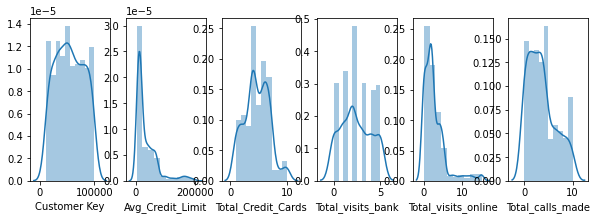

In [50]:
#Let us use seaborn distplot to analyze the distribution of our columns
f, ax = plt.subplots(1, 6, figsize=(10,3))
vis1 = sns.distplot(mydata["Customer Key"],bins=10, ax= ax[0])
vis2 = sns.distplot(mydata["Avg_Credit_Limit"],bins=10, ax=ax[1])
vis3 = sns.distplot(mydata["Total_Credit_Cards"],bins=10, ax= ax[2])
vis4 = sns.distplot(mydata["Total_visits_bank"],bins=10, ax=ax[3])
vis5 = sns.distplot(mydata["Total_visits_online"],bins=10, ax=ax[4])
vis6 = sns.distplot(mydata["Total_calls_made"],bins=10, ax=ax[5])
f.savefig('subplot.png')

In [52]:
# generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix = np.cov(mydata.T) # the relevanat covariance matrix
print('Covariance Matrix \n%s', cov_matrix)

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 6.56782708e+08  6.61523061e+07 -5.71151557e+02 -2.33992229e+01
   1.69327985e+03  4.38265680e+02]
 [ 6.61523061e+07  1.41567733e+09  4.96622201e+04 -6.15895066e+03
   6.09048604e+04 -4.46708397e+04]
 [-5.71151557e+02  4.96622201e+04  4.69950798e+00  1.11712880e+00
   1.06764151e+00 -4.04527061e+00]
 [-2.33992229e+01 -6.15895066e+03  1.11712880e+00  2.66281326e+00
  -2.64372097e+00 -2.36595852e+00]
 [ 1.69327985e+03  6.09048604e+04  1.06764151e+00 -2.64372097e+00
   8.61847611e+00  1.07081437e+00]
 [ 4.38265680e+02 -4.46708397e+04 -4.04527061e+00 -2.36595852e+00
   1.07081437e+00  8.21004047e+00]]
Eigenvectors 
[[ 9.96278301e-01 -8.61948243e-02  2.84165815e-06 -5.02075014e-06
   1.68754259e-06  1.28072920e-06]
 [-8.61948238e-02 -9.96278299e-01 -6.71137715e-06  6.30912295e-05
  -5.98063836e-06 -8.24705574e-06]
 [-7.44886276e-06 -3.47742651e-05  3.10416647e-01 -3.90266562e-01
   3.28993519e-01  8.01933151e-01]
 [ 7.79587093e-07  4.31830807e-06  3.76178756e-01  5.7

In [53]:
# the "cumulative variance explained" analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 68.58518769  99.99999911  99.99999968  99.99999986  99.99999995
 100.        ]


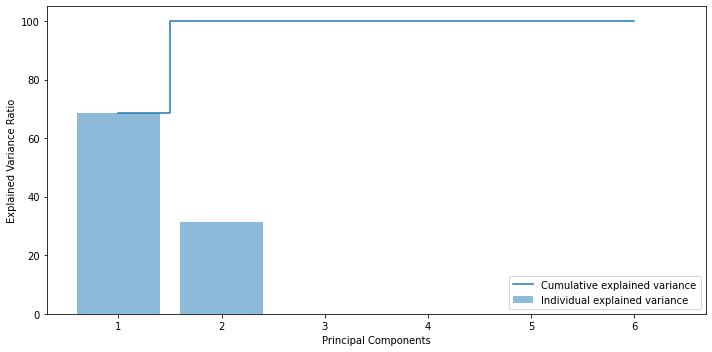

In [54]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [55]:
eigen_pairs = [(np.abs(e_vals[i]), e_vecs[:,i]) for i in range(len(e_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs[:5]


[(1421400625.0559988,
  array([-8.61948243e-02, -9.96278299e-01, -3.47742651e-05,  4.31830807e-06,
         -4.27916957e-05,  3.12837996e-05])),
 (651059421.2107439,
  array([ 9.96278301e-01, -8.61948238e-02, -7.44886276e-06,  7.79587093e-07,
         -5.47216686e-06,  6.58469823e-06])),
 (11.834724067214383,
  array([ 2.84165815e-06, -6.71137715e-06,  3.10416647e-01,  3.76178756e-01,
         -5.55882576e-01, -6.73146055e-01])),
 (3.728079961401657,
  array([-5.02075014e-06,  6.30912295e-05, -3.90266562e-01,  5.71977467e-02,
         -7.75737125e-01,  4.92597540e-01])),
 (1.7440126463096455,
  array([ 1.28072920e-06, -8.24705574e-06,  8.01933151e-01,  2.47746139e-01,
         -4.09562630e-02,  5.42077168e-01]))]